# Data Science For Good: DonorsChoose.org

Founded in 2000 by a Bronx history teacher, DonorsChoose.org has raised $685 million for America's classrooms. Teachers at three-quarters of all the public schools in the U.S. have come to DonorsChoose.org to request what their students need, making DonorsChoose.org the leading platform for supporting public education.

To date, 3 million people and partners have funded 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn, the team at DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.

In the second Kaggle Data Science for Good challenge, DonorsChoose.org, in partnership with Google.org, is inviting the community to help them pair up donors to the classroom requests that will most motivate them to make an additional gift. To support this challenge, DonorsChoose.org has supplied anonymized data on donor giving from the past five years. The winning methods will be implemented in DonorsChoose.org email marketing campaigns.

**Importing libraries**

In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

**Reading data**

In [2]:
path = 'donors-choose-data'

In [18]:
data = {
    'donations' : pd.read_csv(os.path.join(path, 'Donations.csv')),
    'donors' : pd.read_csv(os.path.join(path, 'Donors.csv')),
    #'projects' : pd.read_csv(os.path.join(path, 'Projects.csv')),
    #'resources' : pd.read_csv(os.path.join(path, 'Resources.csv')),
    'schools' : pd.read_csv(os.path.join(path, 'Schools.csv')),
    'teachers' : pd.read_csv(os.path.join(path, 'Teachers.csv'))
}

In [4]:
for k in data.keys():
    print k

donations


**Donations**

In [5]:
data['donations'].head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23


In [6]:
'{:,}'.format(data['donations'].shape[0])

'4,687,884'

In [7]:
# data['donations'].hist(column='Donation Amount')
# data['donations'].hist(column='Donation Amount', bins='auto', color='b')

In [8]:
# data['donations'].groupby('Donation Received Date').size()

In [9]:
'''
grouped = data['donations'].groupby('Donation Received Date').size()
unstacked = grouped.unstack()
print unstacked
unstacked.plot.bar(
    stacked=False, colormap= 'Set1_r', figsize=(16, 4), grid=False)
ax = plt.axes()
# x_axis = ax.axes.get_xaxis()
# x_axis.set_ticklabels([])
plt.title('House %s - Votings outcomes per party' % (house))
plt.ylabel('# Votings')
plt.xlabel('Parties')
plt.show()
'''

"\ngrouped = data['donations'].groupby('Donation Received Date').size()\nunstacked = grouped.unstack()\nprint unstacked\nunstacked.plot.bar(\n    stacked=False, colormap= 'Set1_r', figsize=(16, 4), grid=False)\nax = plt.axes()\n# x_axis = ax.axes.get_xaxis()\n# x_axis.set_ticklabels([])\nplt.title('House %s - Votings outcomes per party' % (house))\nplt.ylabel('# Votings')\nplt.xlabel('Parties')\nplt.show()\n"

In [10]:
'Number of projects donated to: {:,}'.format(len(data['donations']['Project ID'].unique()))

'Number of projects donated to: 901,965'

**Donors**

In [13]:
data['donors'].head(2)

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245


In [20]:
'{:,}'.format(data['donors'].shape[0])

'2,122,640'

In [16]:
data['donors']['Donor State'].value_counts().head(6)

California    294695
New York      137957
Texas         134449
Florida       108828
other         107809
Illinois      104381
Name: Donor State, dtype: int64

In [17]:
data['donors']['Donor City'].value_counts().head(6)

Chicago          34352
New York         27863
Brooklyn         22330
Los Angeles      18320
San Francisco    16925
Houston          15839
Name: Donor City, dtype: int64

**Schools**

In [23]:
data['schools'].head(2)

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District


In [24]:
'{:,}'.format(data['schools'].shape[0])

'72,993'

In [48]:
data['schools']['School Metro Type'].value_counts()

suburban    22992
urban       22793
rural       12973
unknown      8125
town         6110
Name: School Metro Type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cee7dd0>]], dtype=object)

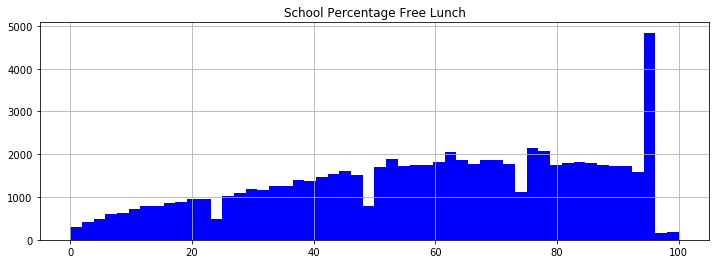

In [64]:
data['schools'].hist('School Percentage Free Lunch', bins='auto', color='b', figsize=(12, 4))

**Teachers**

In [22]:
data['teachers'].head(2)

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23


In [49]:
'{:,}'.format(data['teachers'].shape[0])

'402,900'

In [50]:
data['teachers']['Teacher Prefix'].value_counts()

Mrs.       202142
Ms.        145761
Mr.         47480
Teacher      7404
Dr.            57
Mx.            28
Name: Teacher Prefix, dtype: int64

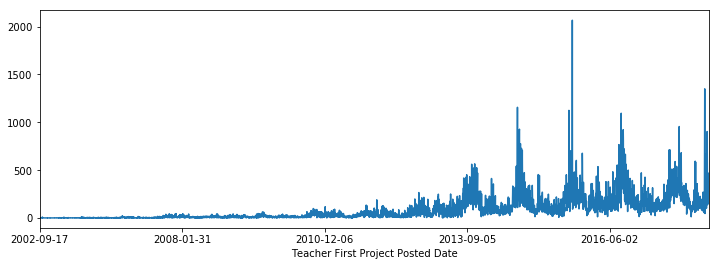

In [65]:
data['teachers'].groupby('Teacher First Project Posted Date').size().plot(figsize=(12, 4))

In [90]:
# pd.value_counts?

In [82]:
# data['teachers']['Teacher First Project Posted Date'].value_counts(dropna=False)

In [84]:
data['teachers']['Teacher First Project Posted Date'] = pd.to_datetime(
    data['teachers']['Teacher First Project Posted Date'])

In [87]:
data['teachers']['Teacher First Project Posted Date'].dt.year.value_counts()

2016    80431
2017    75685
2015    62820
2014    58331
2013    49268
2018    26601
2012    17613
2011    10947
2010     8483
2009     5091
2008     3559
2007     2223
2006     1085
2005      482
2004      216
2003       52
2002       13
Name: Teacher First Project Posted Date, dtype: int64

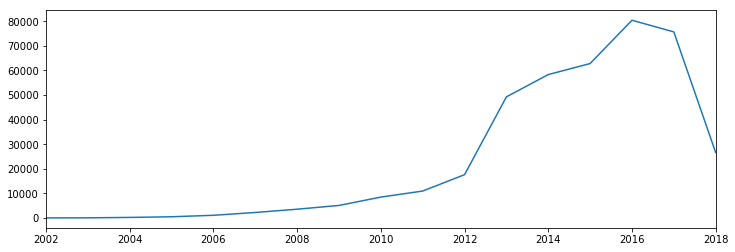

In [91]:
data['teachers']['Teacher First Project Posted Date'].dt.year.value_counts(sort=False).plot(figsize=(12, 4))